In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn skl2onnx onnxruntime

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 60.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.9 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.5
    Uninstalling protobuf-4.25.5:
      Successfully uninstalled protobuf-4.25.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
grpcio-status 1.62.3 requires protobuf>=4.21.6, but you have protobuf 3.20.2 which is incompatible.
tensorflow 2

In [ ]:
import pandas as pd
import numpy as np

# Reload with known fixes
df = pd.read_csv('/content/data_public.csv')

# Check for missing values
print("\nMissing Values Before Filling:")
print(df.isnull().sum())

# Handle missing numerical values by filling with the mean
num_cols = df.select_dtypes(include=['number']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())

# Handle missing categorical values by filling with the mode
cat_cols = df.select_dtypes(exclude=['number']).columns
for col in cat_cols:
    if not df[col].mode().empty:
        df[col].fillna(df[col].mode().iloc[0], inplace=True)
    else:
        df[col].fillna("Unknown", inplace=True)  # Fallback for completely empty columns

# Verify missing values are filled
print("\nMissing Values After Filling:")
print(df.isnull().sum())



Missing Values Before Filling:
A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
Class    0
dtype: int64

Missing Values After Filling:
A        0
B        0
C        0
D        0
E        0
F        0
G        0
H        0
I        0
J        0
K        0
L        0
M        0
N        0
O        0
Class    0
dtype: int64


In [ ]:
# Extract feature and target columns
X = df.drop(columns=['Class'])
y = df['Class']


In [ ]:
from sklearn.model_selection import train_test_split

# Define target and features
target = 'Class'  # Replace with your target column
X = df.drop(columns=[target])
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Confirm data split
print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape: {X_test.shape}")


Training Data Shape: (960000, 15)
Testing Data Shape: (240000, 15)


Accuracy: 0.7239416666666667

Classification Report:
              precision    recall  f1-score   support

           1       0.50      0.31      0.38     36189
           2       0.75      1.00      0.86     89845
           3       0.74      0.64      0.69    113966

    accuracy                           0.72    240000
   macro avg       0.66      0.65      0.64    240000
weighted avg       0.71      0.72      0.70    240000



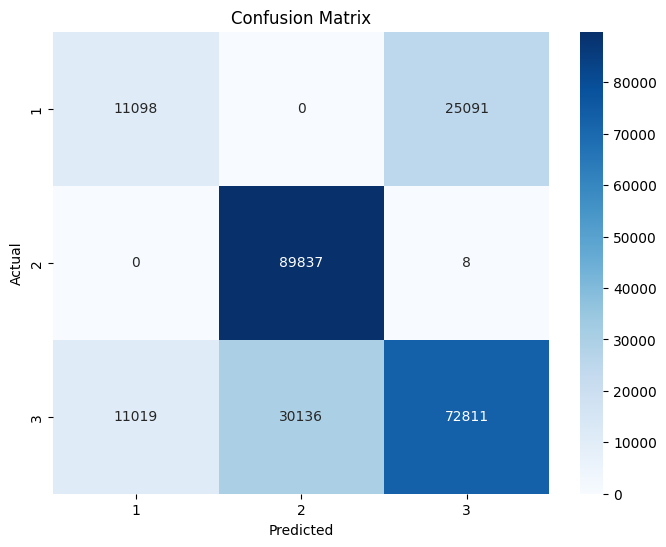

In [ ]:
from sklearn.compose import ColumnTransformer  # Import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Preprocessing: Scaling numerical features and encoding categorical features
num_features = X_train.select_dtypes(include=['number']).columns.tolist()
cat_features = X_train.select_dtypes(include=['object']).columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# 2. Pipeline: Preprocessor + Classifier
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# 3. Train the model
model.fit(X_train, y_train)

# 4. Evaluate the model
y_pred = model.predict(X_test)

# Display evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
